# K-means Clustering in OpenCV

K-means clustering and segmentation is documented, [here](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(2000, 3008, 3)


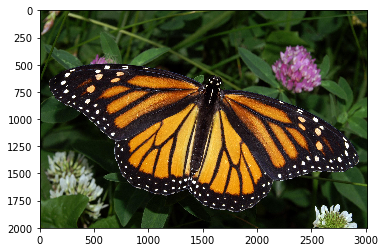

In [8]:
image = cv2.imread('images/monarch.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

print(image_copy.shape)

plt.imshow(image_copy)

### Prepare data for K-means

* We need to first reshape the image into 2D array so that we can feed it into the K-means algorithm.
* We then convert type of the 2D array into float.
* OpenCV K-means function expect this kind of data.

In [9]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image_copy.reshape([-1, 3])

# Convert to float type
pixel_vals = np.float32(pixel_vals)

print(pixel_vals.shape)

(6016000, 3)


### Implement K-means clustering

(6016000, 1)
(2, 3)
(2, 3)
(6016000,)


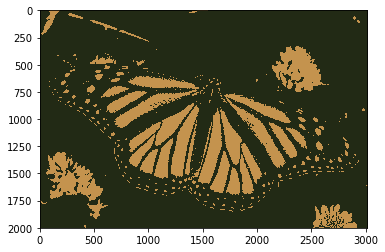

In [11]:
K = 2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# The kmeans function takes in:
# 1. m by 3 array of pixel values
# 2. the number of clusters, K
# 3. any labels we want; we set None in this case
# 4. stop criteria
# 5. number of attempts
# 6. the way to choose initial center points; we set random in this case
# This function returnes
# 1. labels for every training points (i.e., pixel values)
# 2. cluster centers
retval, labels, centers = cv2.kmeans(pixel_vals, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

print(labels.shape)
print(centers.shape)

# Convert data into 8-bit values
centers = np.uint8(centers)

print(centers.shape)
print(labels.flatten().shape)

segmented_data = centers[labels.flatten()]

# Reshape data into the original image dimension
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0], image_copy.shape[1])

plt.imshow(segmented_image)